# Visualize one robot for one day

Analize the result of an experiment that involves running one robot for one day. This experiment was specified by the exp/run of type __1robot1day__. It is expected that the experiment was run by running the notebook 1Robot1Day-Run, which means that the corresponding results had been left in the "results.pickle" file in the exp/run datadir. 

This notebook loads those results and visualizes them. 

In [5]:
import sys
sys.path.append("..")
from exp_run_config import Config
Config.PROJECTNAME = "WaterBerryFarms"

import pathlib
from pprint import pprint
import gzip as compress
import pickle

#from wbf_figures import end_of_day_graphs
import wbf_figures
import matplotlib.pyplot as plt

In [6]:
# the experiment for the robot run
experiment = "1robot1day"

# run = "rwp-ad-30"
# run = "fblm-ad-30"
# run = "fblm-gp-30"
# run = "fblm-generator-gp-30"
run = "confidence-guided-ipp-01"

exp = Config().get_experiment(experiment, run)
pprint(exp)

resultsfile = pathlib.Path(exp["data_dir"], "results.pickle")
if not resultsfile.exists():
    print(f"Results file does not exist:\n{resultsfile}")
    print("Run the notebook Run-1Robot1Day with the same exp/run to create it.")
    raise Exception("Nothing to do.")

# load the results file
with compress.open(resultsfile, "rb") as f:
    results = pickle.load(f)
# if "picture-path" in results:
#     print("Picture path in results!")
#     picture_paths.append(results["picture-path"])

***ExpRun**: Configuration for exp/run: 1robot1day/confidence-guided-ipp-01 successfully loaded
Experiment:
    data_dir: /Users/lboloni/Documents/Develop/Data/WBF/1robot1day/confidence-guided-ipp-01
    exp_environment: miniberry-30
    exp_estimator: gaussian-process
    exp_policy: confidence-guided-ipp-span-05
    exp_run_sys_indep_file: /Users/lboloni/Documents/Develop/Github/WBF/WaterberryFarms/experiment_configs/1robot1day/confidence-guided-ipp-01.yaml
    exp_score: weighted_asymmetric
    experiment_name: 1robot1day
    im_resolution: 50
    run_name: confidence-guided-ipp-01
    subrun_name: null
    time-start-environment: 6
    timesteps-per-day: 500
    velocity: 1



INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 44 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'E', 'G', 'H', 'L', 'P', 'R', 'S', 'T', 'V', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 38, 40, 42, 43, 47, 51, 53, 54, 55, 57, 60, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 3228]
INFO:fontTools.subset:Closed g

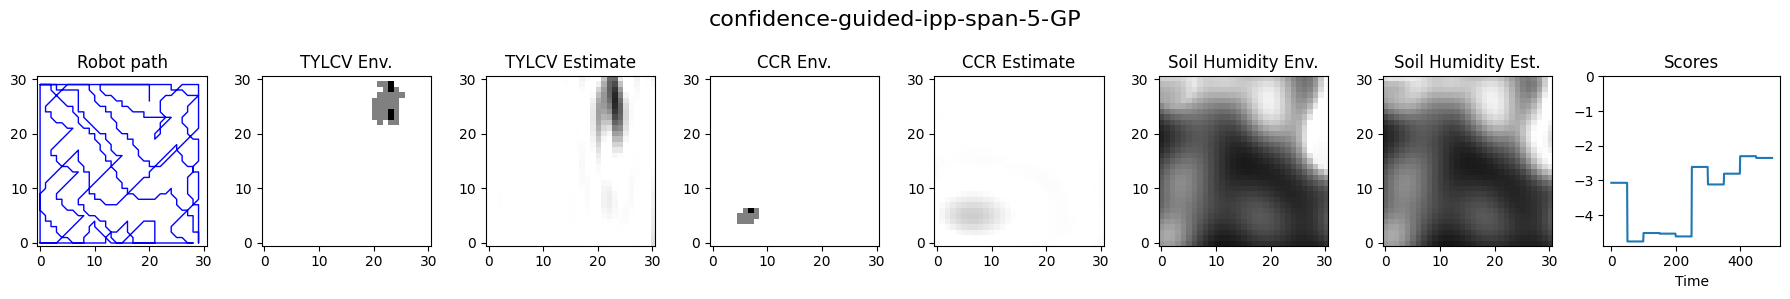

In [7]:
wbf_figures.end_of_day_graphs(results, "daily-summary.pdf", plot_uncertainty = False)

/var/folders/md/0nymjxfj0739zq6dqz0v7g840000gn/T/ipykernel_97802/2919784591.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 38 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'E', 'I', 'L', 'M', 'P', 'R', 'S', 'T', 'V', 'Y', 'a', 'b', 'c', 'e', 'four', 'h', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'three', 'two', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 38, 40, 44, 47, 48, 51, 53, 54, 55, 

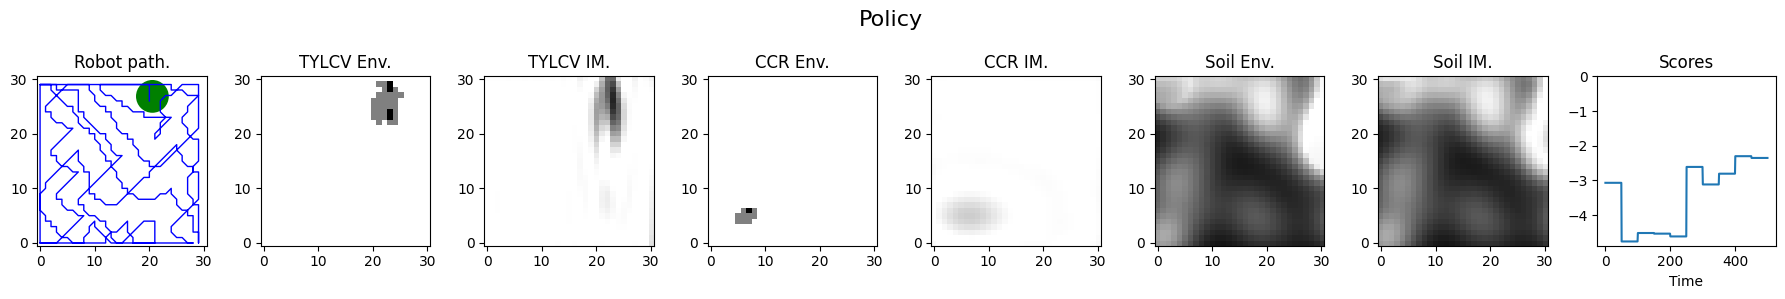

In [8]:
fig, ((ax_robot_path, ax_env_tylcv, ax_im_tylcv, ax_env_ccr, ax_im_ccr, ax_env_soil, ax_im_soil, ax_scores)) = plt.subplots(1, 8, figsize=(18,3))


wbf_figures.show_empty(results, ax_robot_path)
wbf_figures.show_robot_path(results, ax_robot_path)
wbf_figures.show_env_tylcv(results, ax_env_tylcv)
wbf_figures.show_im_tylcv(results, ax_im_tylcv)
wbf_figures.show_env_ccr(results, ax_env_ccr)
wbf_figures.show_im_ccr(results, ax_im_ccr)
wbf_figures.show_env_soil(results, ax_env_soil)
wbf_figures.show_im_soil(results, ax_im_soil)

wbf_figures.graph_scores(results, ax_scores, label = None)

fig.suptitle("Policy", fontsize=16)
fig.tight_layout()
fig.show()
plt.savefig(pathlib.Path(results["results-basedir"], "daily-new.pdf"))